In [1]:
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img_path = Path.cwd().joinpath("images")
umx_path = Path("/media/mvitry/Windows/umx")
acg_output_paths = [f for f in umx_path.iterdir() if f.name.startswith("output - acg")]
celg_output_paths = [f for f in umx_path.iterdir() if f.name.startswith("output - celg")]

In [15]:
output_data = []
for p in acg_output_paths:
    with open(p.joinpath("acoustic_guitar.json")) as handle:
        output_data.append(json.load(handle))

"""for p in celg_output_paths:
    with open(p.joinpath("clean_electric_guitar.json")) as handle:
        output_data.append(json.load(handle))"""

output_paths = acg_output_paths #acg_output_paths + celg_output_paths

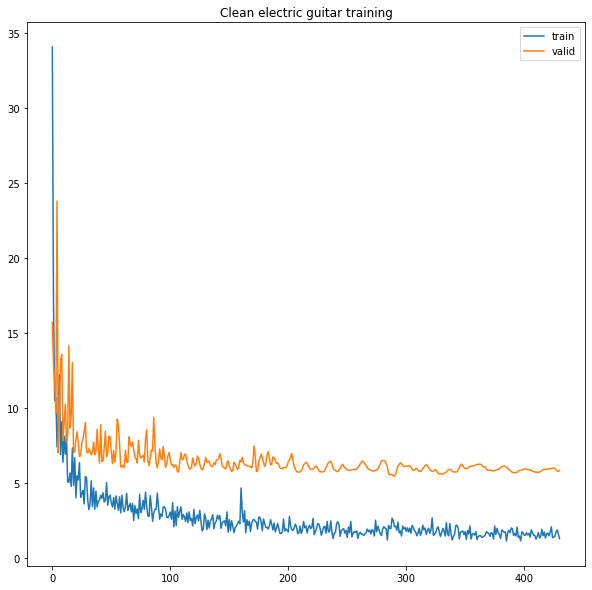

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(output_data[0]["train_loss_history"], label="train")
ax.plot(output_data[0]["valid_loss_history"], label="valid")
ax.set_title("Clean electric guitar training")
  
plt.legend() 
plt.show()
fig.savefig(img_path.joinpath('celg_training_plots.png'), transparent=False, dpi=80, bbox_inches="tight")

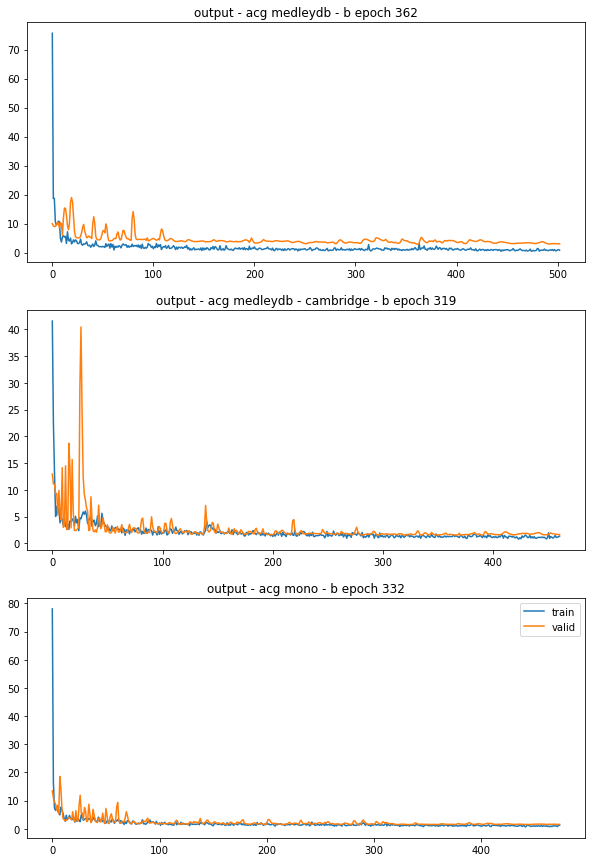

In [17]:
fig, axs = plt.subplots(len(output_data), 1, figsize=(10, 15))

for i, ax in enumerate(axs):
    ax.plot(output_data[i]["train_loss_history"], label="train")
    ax.plot(output_data[i]["valid_loss_history"], label="valid")
    ax.set_title(output_paths[i].name)

plt.suptitle = ("Training plots")   
plt.legend() 
plt.show()
fig.savefig(img_path.joinpath('acg_training_plots.png'), transparent=False, dpi=80, bbox_inches="tight")

In [7]:
training = {"target": [], "nb_channels": [], "best_epoch": [], "best_loss": [], "mean_epoch_duration_s": [], "total_training_time_h" : []}
for t in output_data:
    training["target"].append(t["args"]["target"])
    training["nb_channels"].append(t["args"]["nb_channels"])
    training["best_epoch"].append(t["best_epoch"])
    training["best_loss"].append(t["best_loss"])
    training["mean_epoch_duration_s"].append(np.mean(t["train_time_history"]))
    training["total_training_time_h"].append(sum(t["train_time_history"]) / 3600)

In [8]:
training_df = pd.DataFrame.from_dict(training)

In [9]:
training_df.head()

,target,nb_channels,best_epoch,best_loss,mean_epoch_duration_s,total_training_time_h
0,acoustic_guitar,2,362,2.926651,10.401521,1.444656
1,acoustic_guitar,2,319,1.534418,27.527396,3.494450
2,acoustic_guitar,1,332,1.463976,13.443549,1.755130
3,clean_electric_guitar,2,282,5.482145,56.558226,6.582749


### Nb parameters
```
output - acg medleydb - b epoch 362: 8897444
output - acg medleydb - cambridge - b epoch 319: 8897444
output - acg mono - b epoch 332: 7082914
output - celg - 282 epochs: 8897444
```